In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import pydicom
import os
import glob
import pickle
import pandas as pd
import csv
from pathlib import Path
from IPython.display import HTML
from os import listdir, mkdir
import imageio
from IPython import display
from sklearn.metrics import roc_auc_score, roc_curve, auc
import scipy

import tensorflow as tf
from keras.models import load_model
from keras import layers 
from keras.layers import Concatenate,Input, Dense, Activation, ZeroPadding2D, \
BatchNormalization, Flatten, Conv2D 
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, \
GlobalAveragePooling2D 
from keras.models import Model, Sequential 
from keras.preprocessing import image 
from keras.utils import layer_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
def KerasModel(input_shape):  
    NumClass = 7
    X_input  = Input(input_shape)
     
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    #Convolução, pelo filtro de kernels cria pela somatoria varias camadas com pedaços da imagem
    X = Conv2D(40, (3, 3), strides = (1, 1), name = 'conv0')(X)    
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    ##
    X = Conv2D(24, (3, 3), strides = (1, 1), name = 'conv1')(X)    
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)  
    ##
    
    ##
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv2')(X)    
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)  
    ##    

    ##   New layer
    X = Conv2D(8, (3, 3), strides = (1, 1), name = 'conv3')(X)    
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool3')(X)  
    ##    
    
    ##   New layer
    X = Conv2D(8, (3, 3), strides = (1, 1), name = 'conv4')(X)    
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool4')(X)  
    ##    


    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dropout(0.5)(X)
    X = Dense(NumClass, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='KerasModel')
    
    return model 

In [3]:
number_run = 0
Path         =  "E:/cancer de pele/TRAIN/1/" + str(number_run) + "-Data.pckl"
f = open(Path, 'rb')
[X,Y] = pickle.load(f)

[0, 0, 1, 0, 0, 0, 0]


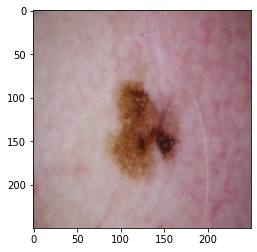

In [4]:
X = X.astype(int)
plt.imshow(X[1])
print(Y[10])

In [5]:
X[0].shape

(250, 250, 3)

In [6]:
# Construct the model
ModelCancer = KerasModel(X[0].shape) # input dimention
# Run the model
ModelCancer.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [7]:
ModelCancer.summary()

Model: "KerasModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 256, 256, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 254, 254, 40)      1120      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 254, 254, 40)      160       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 40)      0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 127, 127, 40)      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 125, 125, 24)      8

# MUDAR ENDEREÇO

In [8]:
train = 1
p1 = "E:/cancer de pele/rede2/"
# load model
#ModelCancer = load_model(p1 + 'modelo/' + str(train-1) + '/ModelCancer-10.h5') 


In [9]:
Path     =  'E:/cancer de pele/validação/0-validacao.pckl'
f = open(Path, 'rb')
[Xa,Ya] = pickle.load(f)
Ya = np.array(Ya)


plot_hist = []
plot_val_hist = []
plot_loss = []
plot_val_loss = []
model = []
acc = []
val_acc = []

for i in range(11):
    save_history = p1 + 'results/' + str(train) + '/history-' + str(i) + '.png'
    save_history1 = p1 + 'results/' + str(train) + '/GLOBAL-history-' + str(i) + '.png'
    save_loss    = p1 + 'results/' + str(train) +  '/loss-' + str(i) + '.png'
    save_loss1    = p1 + 'results/' + str(train) +  '/GLOBAL-loss-' + str(i) + '.png'
    save_model   = p1 + 'modelo/' + str(train) + '/ModelCancer-' + str(i) + '.h5'
    Path         = p1 + 'TRAIN/'+ str(train) + '/' + str(i) + '-Data.pckl' #local onde as 8 amostras estão
    f = open(Path, 'rb')
    [Xt,Yt] = pickle.load(f)
    Yt = np.array(Yt)
    Xt = Xt.astype(int)
    
    
    # save fit model
    history = ModelCancer.fit(x = Xt, y = Yt, batch_size = 2**7, epochs = 7, validation_data=(Xa, Ya))
     #save model
    ModelCancer.save(save_model)
    
    model.append(i)
    acc.append(history.history['accuracy'][6])
    val_acc.append(history.history['val_accuracy'][6])
    plot_hist.extend(history.history['accuracy'])
    plot_val_hist.extend(history.history['val_accuracy'])
    plot_loss.extend(history.history['loss'])-
    
    plot_val_loss.extend(history.history['val_loss'])
    
    # save validation fit model
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(save_history, format='png')
    plt.show()
   
    # save validation loss model
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(save_loss, format='png')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-9-2b9d881fdd42>, line 1)

# PLOT TRAINING

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(plot_hist)
plt.plot(plot_val_hist)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'loss', 'val_loss'], loc='upper left')
plt.savefig(save_history1, format='png')
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(plot_loss)
plt.plot(plot_val_loss)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'loss', 'val_loss'], loc='upper left')
plt.savefig(save_loss1, format='png')
plt.show()

In [ ]:
data = {'Model': model,
        'acc': acc,
        'val_acc': val_acc}

df = pd.DataFrame(data, columns = ['Model', 'acc', 'val_acc'])
df.to_excel(p1 + 'results/' + str(train) + '/cancer-acc' + str(train) + '.xlsx')
df.head(10)

In [ ]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [ ]:
#os.system("shutdown -s")

In [ ]:
os.system("shutdown -s")